# Stock Market Analysis: Google Inc. (GOOGL)

This notebook explores the historical performance of Google Inc.'s stock, covering data exploration, technical indicators, visual analytics, and forecasting using linear regression. Inspired by multi-stock tech sector analyses, this project focuses exclusively on GOOGL for a deeper single-stock evaluation.

Key objectives:
- Analyze Google stock’s trends using historical price and volume data
- Generate technical indicators such as moving averages and daily returns
- Visualize patterns, volatility, and seasonality
- Predict short-term closing prices using a simple regression model

We import necessary libraries for data manipulation, visualization, and modeling.

In [1]:
pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Import Libraries.
We start by importing all necessary libraries for data manipulation, visualization, and modeling.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

Load the Dataset. We load the Google stock dataset and parse the 'Date' column as datetime.


In [3]:
df = pd.read_csv("/Users/kristina/python/Google/Google_stock_data.csv", parse_dates=['Date'])


Set 'Date' as Index. To prepare for time series analysis, we set the 'Date' column as the DataFrame index.


In [4]:
df.set_index('Date', inplace=True)

Feature Engineering. We engineer new features such as daily returns and moving averages.


In [5]:
df['Daily Return'] = df['Close'].pct_change()
df['MA30'] = df['Close'].rolling(window=30).mean()
df['MA90'] = df['Close'].rolling(window=90).mean()
df['Days'] = (df.index - df.index.min()).days

Visualize Price and Moving Averages. We plot the closing price along with 30-day and 90-day moving averages.


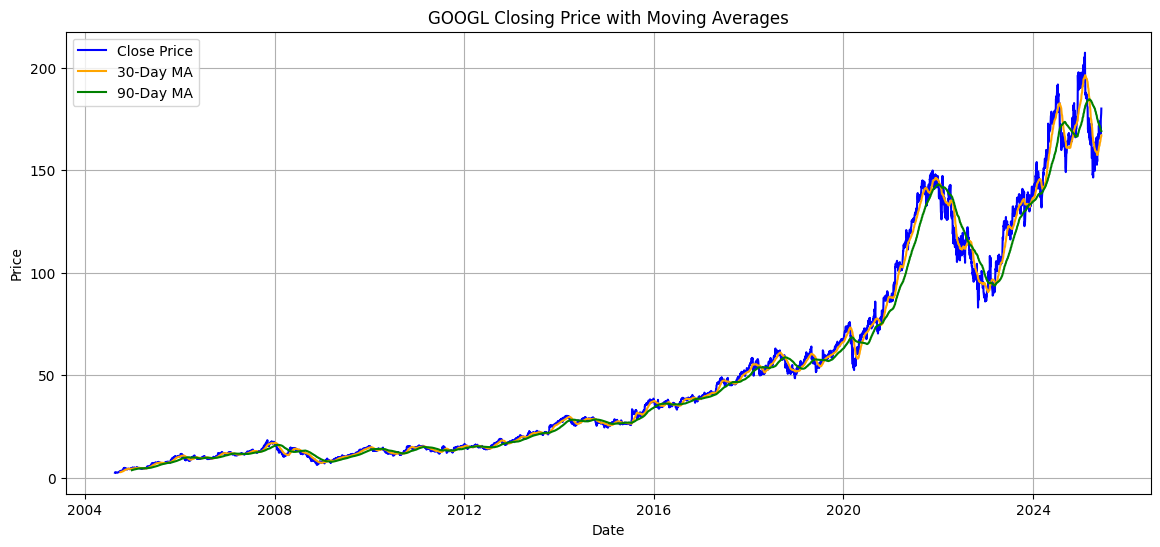

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['MA30'], label='30-Day MA', color='orange')
plt.plot(df['MA90'], label='90-Day MA', color='green')
plt.title('GOOGL Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Analyze Monthly Volume Trends. We aggregate the trading volume monthly to spot volume trends.

/var/folders/5f/l3v2_4ms44z125nm751rrzym0000gq/T/ipykernel_14540/181646993.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Volume'].resample('M').sum().plot(kind='bar', figsize=(14, 4), color='purple')


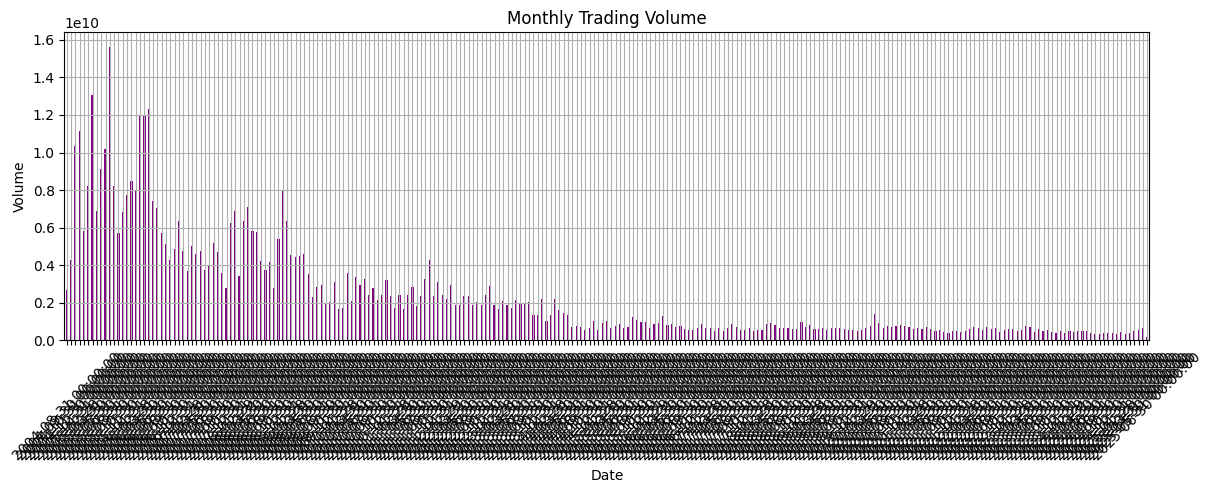

In [7]:
df['Volume'].resample('M').sum().plot(kind='bar', figsize=(14, 4), color='purple')
plt.title('Monthly Trading Volume')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Key Statistical Insights. We extract and display key financial metrics from the dataset.

In [9]:
print(f"All-Time High: {df['High'].max():.2f}")
print(f"All-Time Low: {df['Low'].min():.2f}")
print(f"Average Daily Return: {df['Daily Return'].mean():.4f}")
print(f"Volatility (STD): {df['Daily Return'].std():.4f}")

All-Time High: 208.21
All-Time Low: 2.38
Average Daily Return: 0.0010
Volatility (STD): 0.0194


Correlation Analysis. We generate a heatmap to understand the correlation between numerical features.

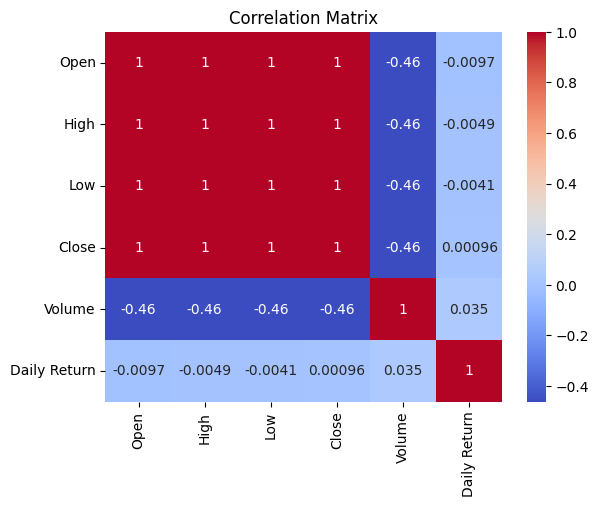

In [10]:
corr = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Seasonal Decomposition. We decompose the closing price time series into trend, seasonal, and residual components.

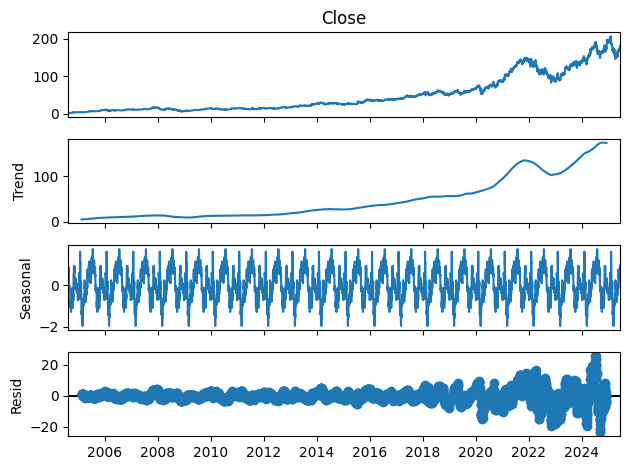

In [11]:
result = seasonal_decompose(df['Close'].dropna(), model='additive', period=252)
result.plot()
plt.tight_layout()
plt.show()

Forecasting with Linear Regression. We use a linear regression model to predict the next 30 days of closing prices.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


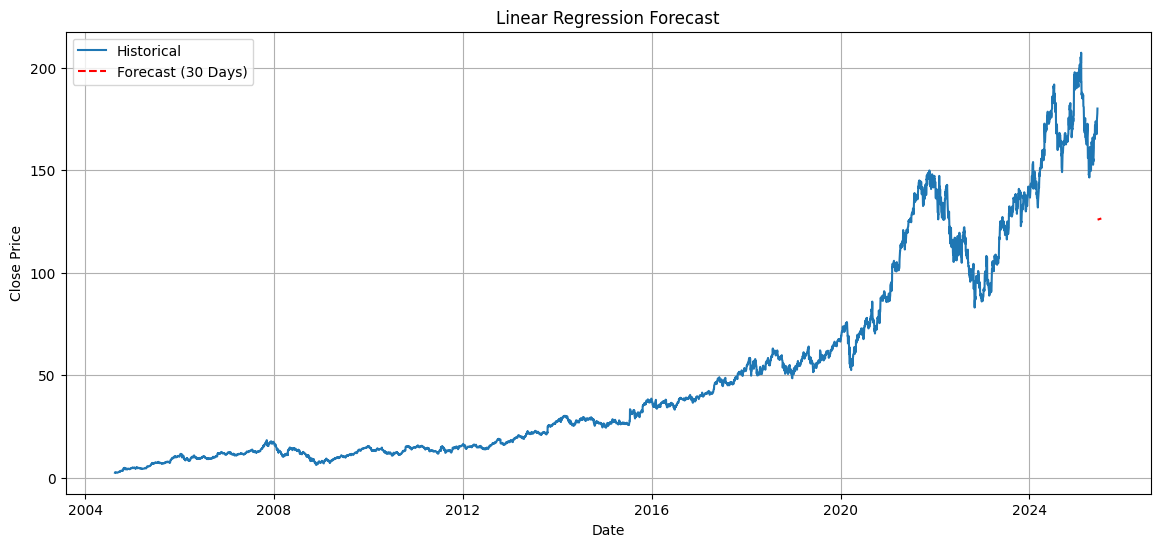

In [12]:
X = df[['Days']]
y = df['Close']

model = LinearRegression()
model.fit(X, y)

future_days = np.arange(df['Days'].max() + 1, df['Days'].max() + 31).reshape(-1, 1)
future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=30)
predicted = model.predict(future_days)

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Historical')
plt.plot(future_dates, predicted, '--', color='red', label='Forecast (30 Days)')
plt.title('Linear Regression Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()